## 🔧 Setup for Modular Imports

To keep our project modular and clean, we're importing our custom utility functions from the `src/` directory.  
However, Jupyter notebooks don't automatically recognize modules in parent folders.  
So, we add the root project folder to the system path manually using Python's `sys.path.append()`.

This lets us import from files like `src/data_loader.py` and `src/eda_utils.py` without moving them or hardcoding paths.


In [1]:
# Add root project folder to the system path so we can import from src/
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#  Custom modules
from src.data_loader import load_data
from src.eda_utils import (
    check_missing_values,
    get_column_info,
    describe_text_length,
    count_unique
)


In [4]:
import pandas as pd
from src.data_loader import load_data
from src.eda_utils import (
    display_basic_info,
    display_summary_stats,
    count_articles_per_publisher,
    analyze_publication_dates,
    publication_time_distribution,
    extract_unique_publisher_domains,
    simple_keyword_count
)

# Load dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv')


# Display basic info and summary statistics
display_basic_info(df)
display_summary_stats(df)

# Count articles per publisher
publisher_counts = count_articles_per_publisher(df)
print("=== Article Counts Per Publisher ===")
print(publisher_counts)

# Analyze publication dates for trends
pub_date_counts = analyze_publication_dates(df, date_col='date')
print("\n=== Publication Date Counts ===")
print(pub_date_counts)

# Analyze publication time distribution (hours)
pub_time_counts = publication_time_distribution(df, date_col='date') 
print("\n=== Publication Time Distribution (Hour of Day) ===")
print(pub_time_counts)

# Extract unique publisher domains (if publishers are emails)
unique_domains = extract_unique_publisher_domains(df)
print("\n=== Unique Publisher Email Domains ===")
print(unique_domains)

# Simple keyword count in headlines (customize your keywords)
keywords = ["FDA approval", "price target", "earnings", "merger"]
keyword_counts = simple_keyword_count(df, 'headline', keywords)
print("\n=== Keyword Counts in Headlines ===")
print(keyword_counts)

=== Basic DataFrame Info ===
Number of rows: 1407328
Number of columns: 6

Column data types:
Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object


=== Summary Statistics ===
Descriptive statistics for numerical columns:
         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06

Missing values per column:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


=== Article Counts Per Publisher ===
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Leng

In [3]:
import os
print(os.getcwd())


c:\Users\aweso\financial-news-sentiment-analysis\notebooks


In [5]:
# Load and analyze the data
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Basic information about the dataset
print("=== Column Information ===")
print(get_column_info(df))

print("\n=== Missing Values ===")
print(check_missing_values(df))

print("\n=== Headline Length Statistics ===")
print(describe_text_length(df, 'headline'))

print("\n=== Unique Values per Column ===")
for column in df.columns:
    print(f"\n{column}:")
    print(count_unique(df, column).head())

=== Column Information ===
             dtype  non_nulls  nulls
Unnamed: 0   int64    1407328      0
headline    object    1407328      0
url         object    1407328      0
publisher   object    1407328      0
date        object    1407328      0
stock       object    1407328      0

=== Missing Values ===
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

=== Headline Length Statistics ===
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64

=== Unique Values per Column ===

Unnamed: 0:
Unnamed: 0
1413832    1
1413831    1
1413830    1
1413829    1
1413828    1
Name: count, dtype: int64

headline:
headline
Benzinga's Top Upgrades                     5449
Benzinga's Top Downgrades                   5372
Benzinga's Top Initiations                  4241
Stocks That Hit 52-Wee

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

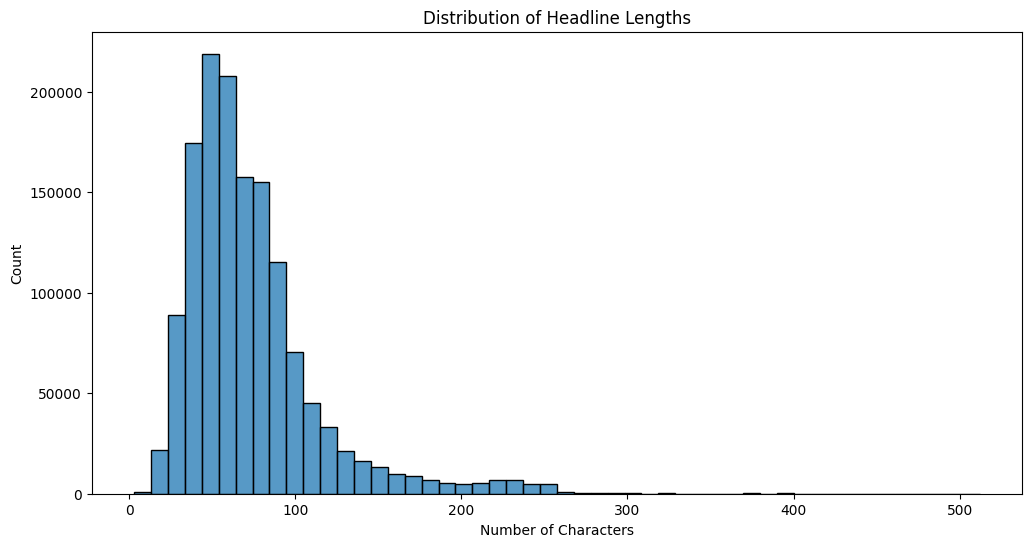

In [7]:
# Plot headline length distribution
plt.figure(figsize=(12, 6))
df['headline_length'] = df['headline'].str.len()
sns.histplot(data=df, x='headline_length', bins=50)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()

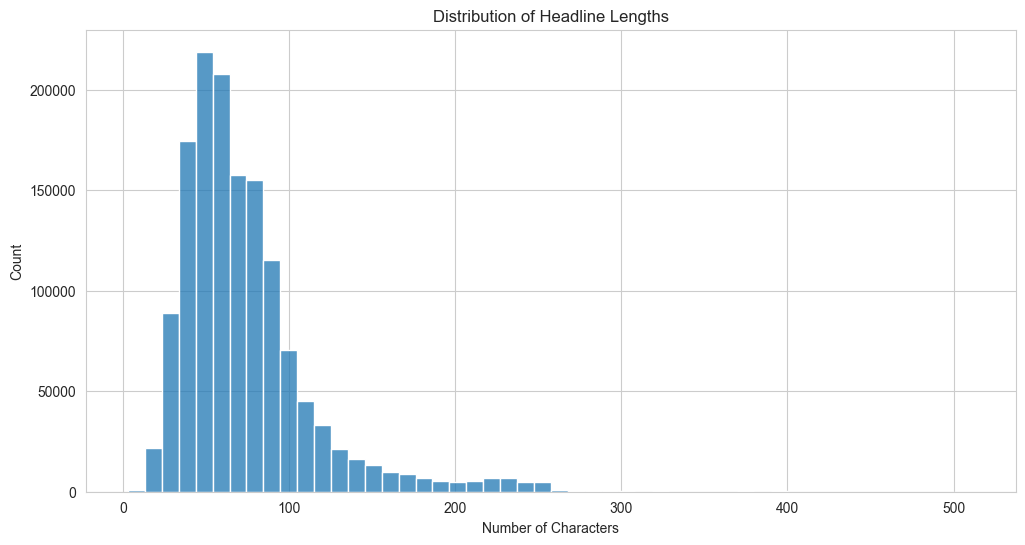

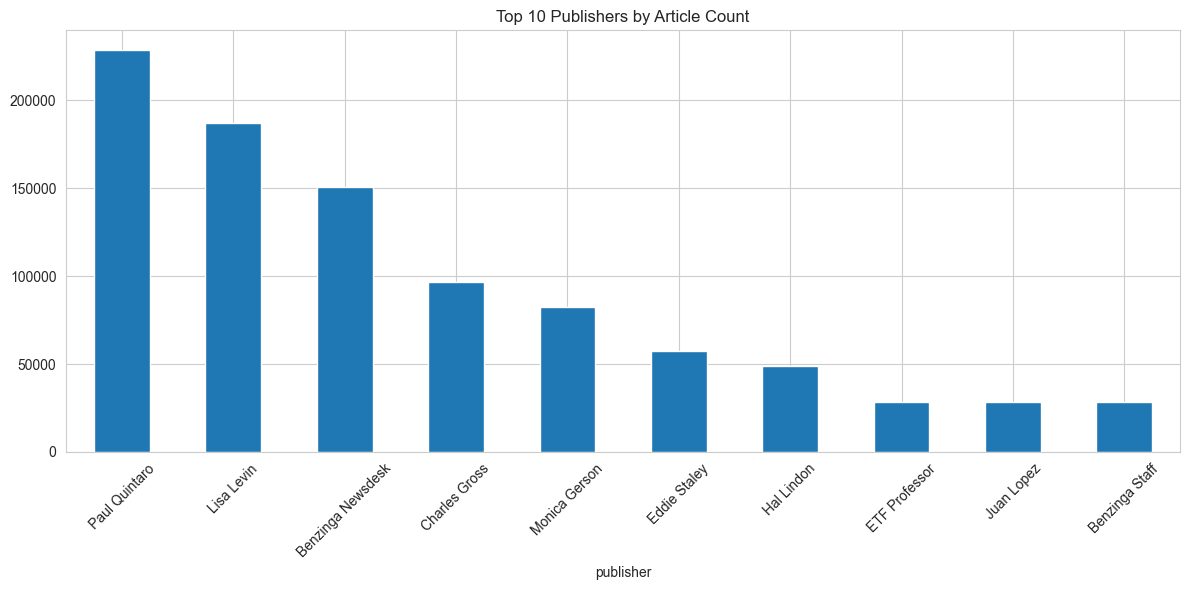

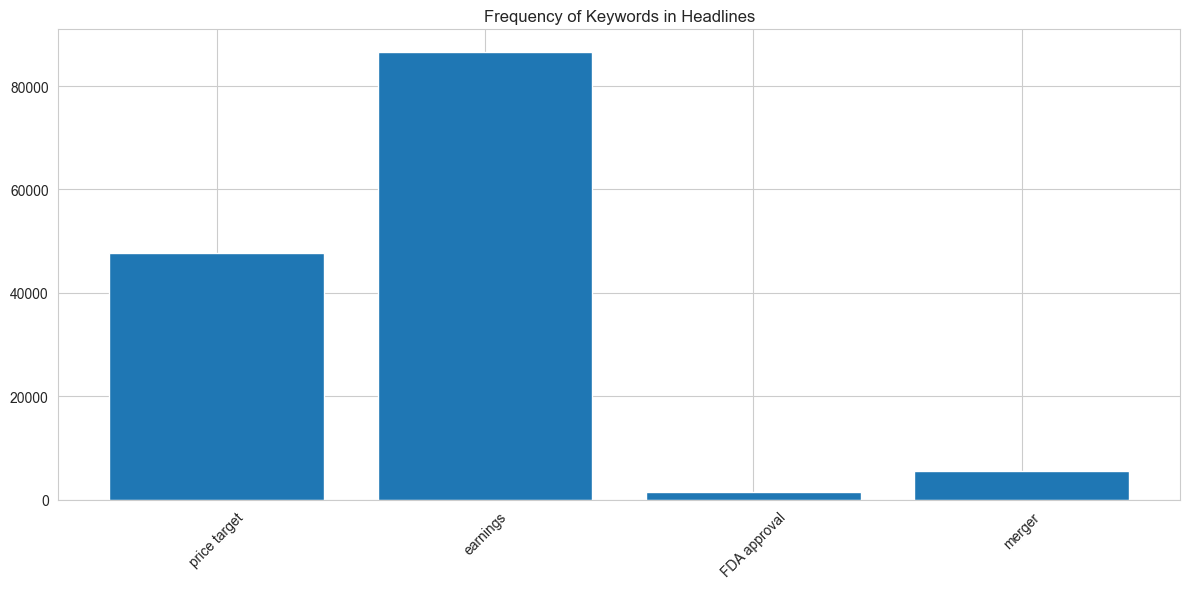

In [10]:
import seaborn as sns

# Set the style using seaborn's set_style
sns.set_style("whitegrid")

# 1. Plot headline length distribution
plt.figure(figsize=(12, 6))
df['headline_length'] = df['headline'].str.len()
sns.histplot(data=df, x='headline_length', bins=50)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()

# 2. Plot top publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar')
plt.title('Top 10 Publishers by Article Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Plot keyword frequencies
plt.figure(figsize=(12, 6))
plt.bar(keyword_counts.keys(), keyword_counts.values())
plt.title('Frequency of Keywords in Headlines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

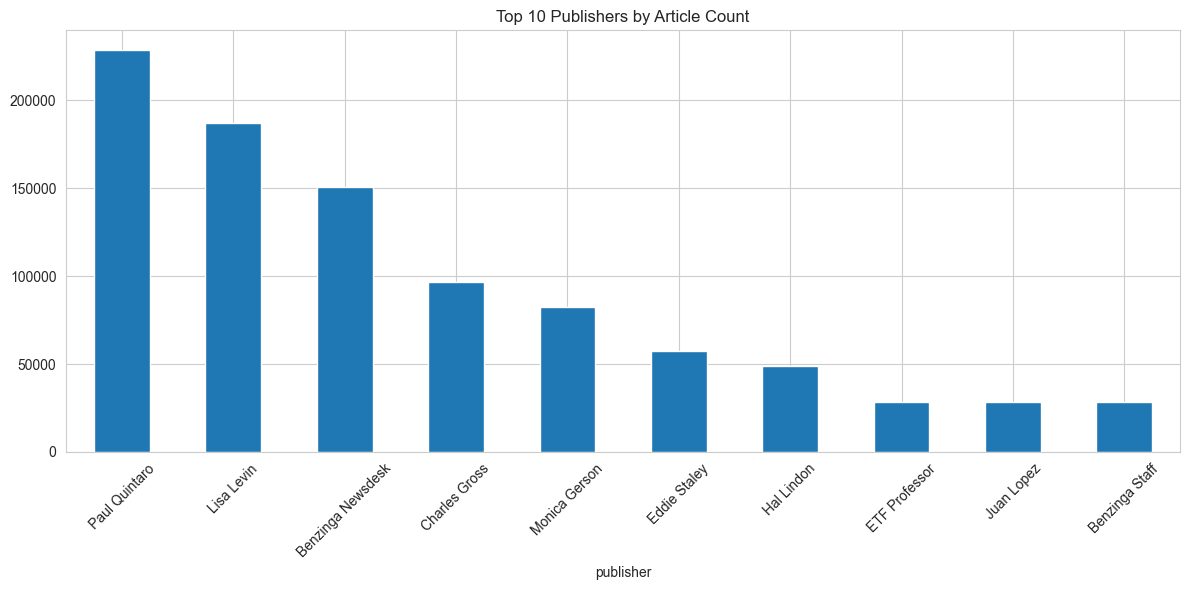

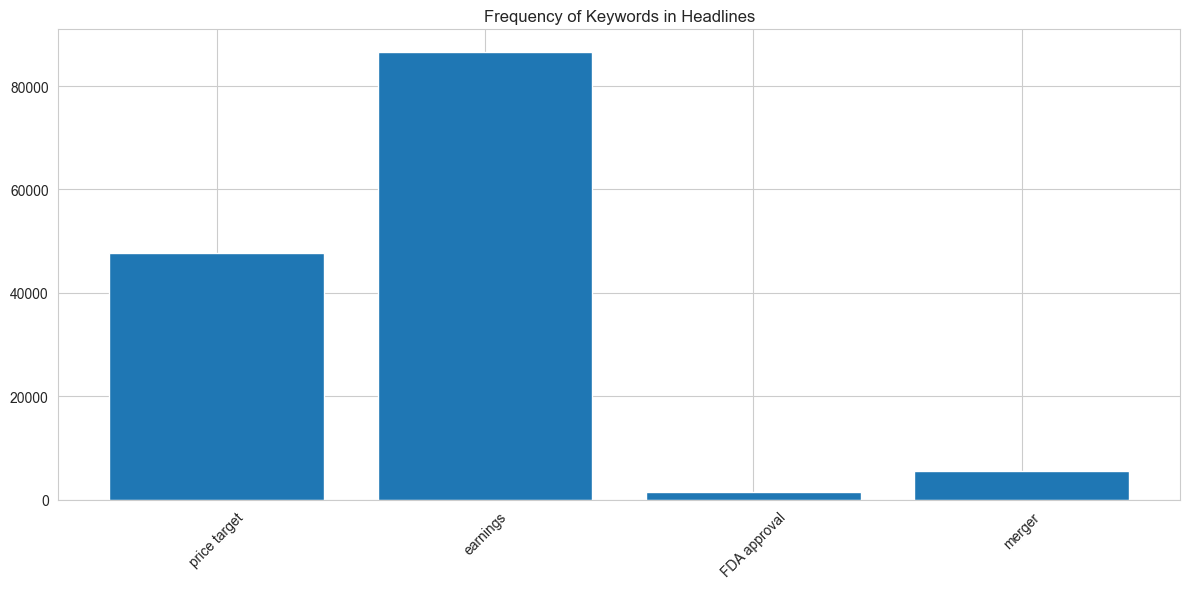

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style using seaborn's set_style
sns.set_style("whitegrid")

# 2. Plot top publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar')
plt.title('Top 10 Publishers by Article Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Plot keyword frequencies
plt.figure(figsize=(12, 6))
plt.bar(keyword_counts.keys(), keyword_counts.values())
plt.title('Frequency of Keywords in Headlines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()